In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ทำให้กราฟสวยขึ้น
plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.2)

In [44]:
df = pd.read_csv("../data/clean-data.csv")
df.head()

,Year,Geography Name,Poverty Estimate,Population Estimate,Poverty Percent
0,2015,Carlsbad,2088,19557,0.107
1,2015,Carlsbad,4525,48277,0.094
2,2015,Carlsbad,2063,19083,0.108
3,2015,Carlsbad,813,16958,0.048
4,2015,Carlsbad,579,6381,0.091


In [45]:
sd = df[df["Geography Name"] == "San Diego County"].copy()
sd

,Year,Geography Name,Poverty Estimate,Population Estimate,Poverty Percent
304,2015,San Diego County,142180,846508,0.168
305,2015,San Diego County,136415,1232716,0.111
306,2015,San Diego County,87666,505384,0.173
307,2015,San Diego County,38856,424553,0.092
308,2015,San Diego County,39143,213029,0.184
309,2015,San Diego County,444260,3222190,0.138
310,2015,San Diego County,241272,1621890,0.149
311,2015,San Diego County,202988,1600300,0.127
312,2016,San Diego County,121730,843482,0.144
313,2016,San Diego County,122188,1234461,0.099


In [46]:
sd.isnull().sum()

Year                   0
Geography Name         0
Poverty Estimate       0
Population Estimate    0
Poverty Percent        0
dtype: int64

In [47]:
sd["Poverty Percent"] = sd["Poverty Percent"].fillna(sd["Poverty Percent"].mean())

In [48]:
sd.describe()

,Year,Poverty Estimate,Population Estimate,Poverty Percent
count,40.00000,40.000000,4.000000e+01,40.000000
mean,2017.00000,144922.350000,1.217020e+06,0.124050
std,1.43223,110626.381325,9.267020e+05,0.027739
min,2015.00000,23943.000000,1.988260e+05,0.084000
25%,2016.00000,60378.500000,4.973952e+05,0.101250
50%,2017.00000,116970.000000,1.039612e+06,0.121500
75%,2018.00000,192620.000000,1.621914e+06,0.144250
max,2019.00000,444260.000000,3.259203e+06,0.184000


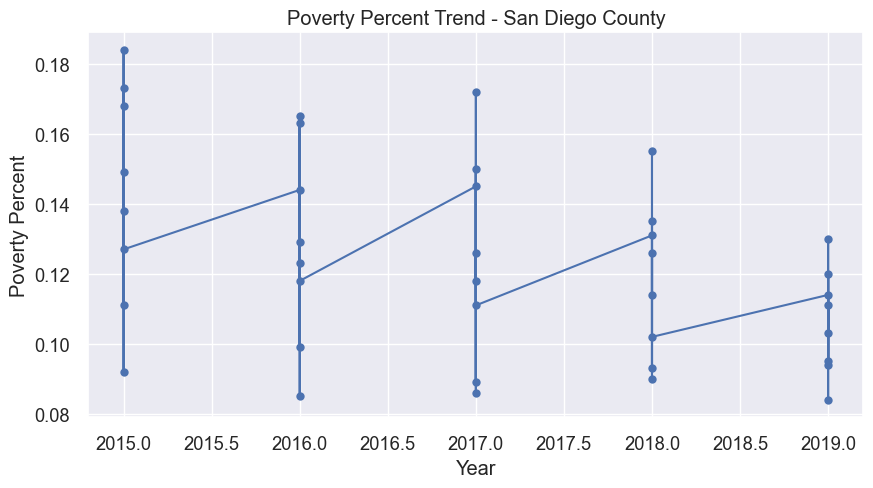

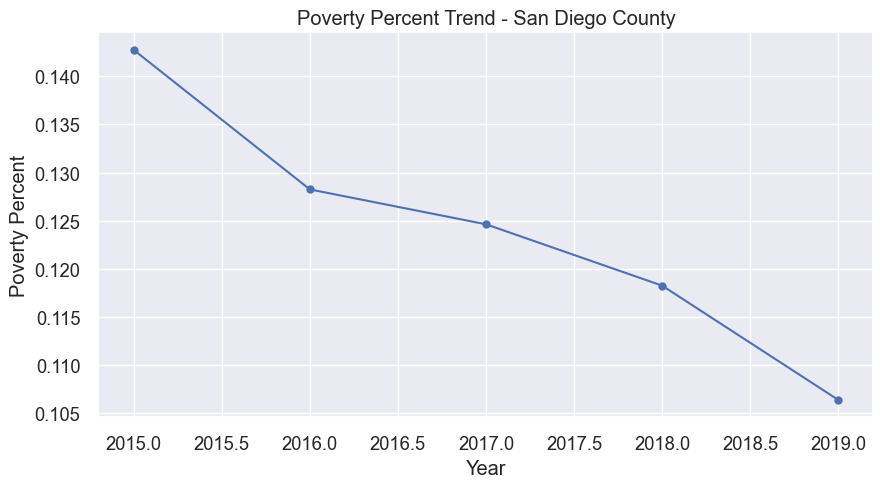

,Year,Poverty Percent
0,2015,0.142750
1,2016,0.128250
2,2017,0.124625
3,2018,0.118250
4,2019,0.106375


In [49]:
plt.figure(figsize=(10,5))
plt.plot(sd["Year"], sd["Poverty Percent"], marker='o')
plt.title("Poverty Percent Trend - San Diego County")
plt.xlabel("Year")
plt.ylabel("Poverty Percent")
plt.grid(True)
plt.show()

# 1) เฉลี่ยค่า Poverty Percent ต่อปี
sd_mean = sd.groupby("Year")["Poverty Percent"].mean().reset_index()

# 2) วาดกราฟ
plt.figure(figsize=(10,5))
plt.plot(sd_mean["Year"], sd_mean["Poverty Percent"], marker='o')
plt.title("Poverty Percent Trend - San Diego County")
plt.xlabel("Year")
plt.ylabel("Poverty Percent")
plt.grid(True)
plt.show()

# 3) แสดงค่าที่เฉลี่ยแล้วด้านล่างกราฟ
sd_mean


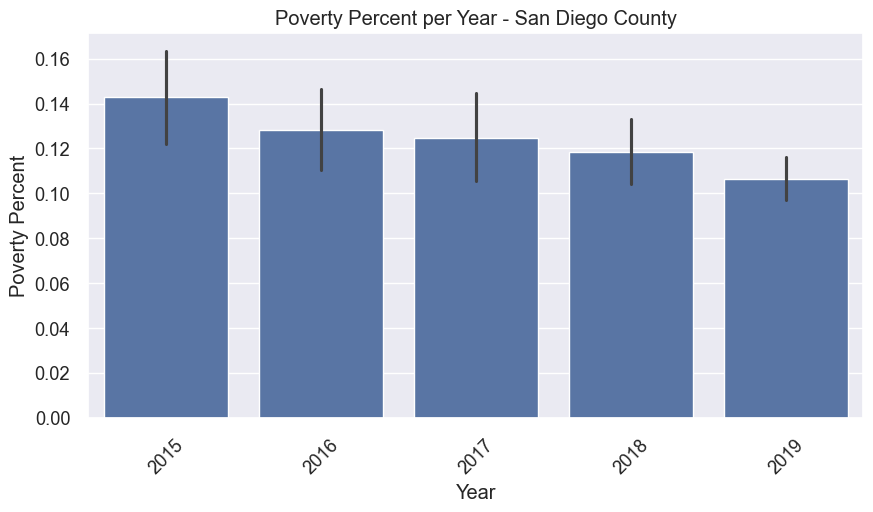

,mean,std,min,max,count
Year,,,,,
2015,0.142750,0.031954,0.092,0.184,8
2016,0.128250,0.028449,0.085,0.165,8
2017,0.124625,0.029990,0.086,0.172,8
2018,0.118250,0.022588,0.090,0.155,8
2019,0.106375,0.015203,0.084,0.130,8


In [50]:
plt.figure(figsize=(10,5))
sns.barplot(data=sd, x="Year", y="Poverty Percent")
plt.title("Poverty Percent per Year - San Diego County")
plt.xticks(rotation=45)
plt.show()

sd.groupby("Year")["Poverty Percent"].agg(["mean", "std", "min", "max", "count"])

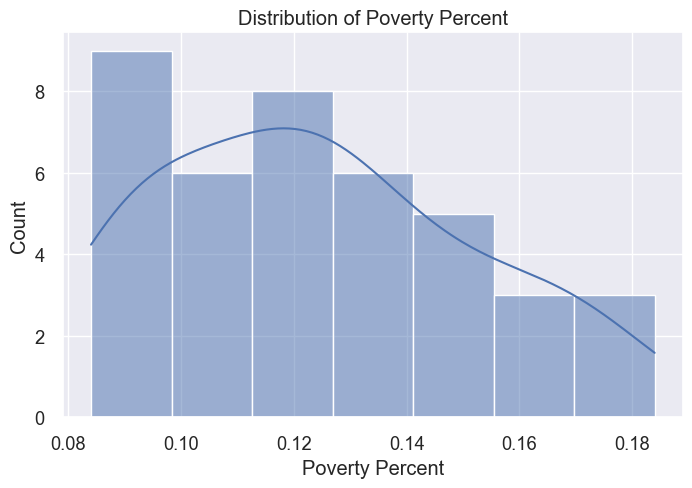

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(sd["Poverty Percent"], kde=True)
plt.title("Distribution of Poverty Percent")
plt.xlabel("Poverty Percent")
plt.show()

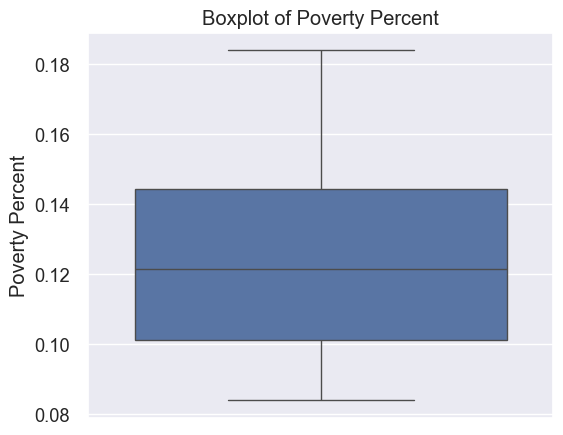

In [52]:
plt.figure(figsize=(6,5))
sns.boxplot(y=sd["Poverty Percent"])
plt.title("Boxplot of Poverty Percent")
plt.show()

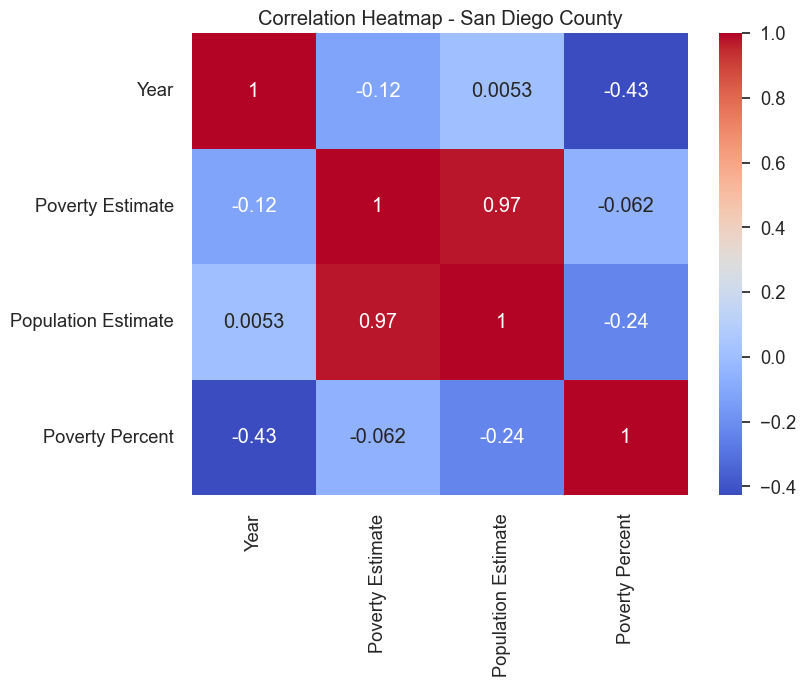

In [53]:
numeric_cols = sd.select_dtypes(include=[np.number])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - San Diego County")
plt.show()